# Exploratory Data Analysis

In [1]:
from datasets import load_dataset

dataset = load_dataset("trl-lib/DeepMath-103K", split="train")

## Manual Inspection

In [2]:
dataset

Dataset({
    features: ['prompt', 'solution'],
    num_rows: 97870
})

In [5]:
import pandas as pd

df = pd.DataFrame(dataset)

In [6]:
df.isnull().sum()

prompt      0
solution    0
dtype: int64

In [7]:
print(f"Number of rows: {len(dataset)}")
subset = dataset.select(range(1000))

Number of rows: 97870


In [12]:
print("===========")
print(f"Question: {subset['prompt'][0][0]['content']}")
print(f"Solution: {subset['solution'][0]}")
print("===========")
print(f"Question: {subset['prompt'][12][0]['content']}")
print(f"Solution: {subset['solution'][12]}")
print("===========")
print(f"Question: {subset['prompt'][25][0]['content']}")
print(f"Solution: {subset['solution'][25]}")

Question: Is it possible to construct an uncountable set of subsets of the positive integers, \( T \), such that for any two subsets \( C, D \) in \( T \), either \( C \) is a subset of \( D \) or \( D \) is a subset of \( C \)? Provide a justification for your answer.
Solution: Yes
Question: We have that $3 \cdot f(x) + 4 \cdot g(x) = h(x)$ where $f(x),$ $g(x),$ and $h(x)$ are all polynomials in $x.$ If the degree of $f(x)$ is $8$ and the degree of $h(x)$ is $9$, then what is the minimum possible degree of $g(x)$?
Solution: $9$
Question: Evaluate the integral \( \int_{0}^1 x \bigg\lceil \frac{1}{x} \bigg\rceil \left\{ \frac{1}{x} \right\}\, dx \), where \( \lceil x \rceil \) is the ceiling function, and \( \left\{x\right\} \) is the fractional part function.
Solution: $\dfrac{1}{2}$


In [39]:
for k in range(50):
    print(f"Solution: {subset['solution'][k]}")

Solution: Yes
Solution: $1$
Solution: $0$
Solution: $\frac{1}{5}$
Solution: Yes
Solution: $2^{p_n}$
Solution: No
Solution: $0$
Solution: $\dfrac{\beta}{a}$
Solution: Yes
Solution: Yes
Solution: $-1$
Solution: $9$
Solution: $\sqrt{2\pi}$
Solution: $1008$
Solution: $1$
Solution: $2\pi^2 R r^2$
Solution: $\emptyset$
Solution: $3600$
Solution: $1$
Solution: Yes
Solution: $\dfrac{\pi}{8}$
Solution: $g(0)$
Solution: $2001+25i$
Solution: $B$
Solution: $\dfrac{1}{2}$
Solution: $2$
Solution: Yes
Solution: $210$
Solution: No
Solution: $16$
Solution: $325$
Solution: $a < -1$
Solution: $0$
Solution: Yes
Solution: $0$
Solution: $6 - 2e$
Solution: $n!$
Solution: $\dfrac{\pi}{4}$
Solution: $\dfrac{2}{7}$
Solution: $0$
Solution: $0$
Solution: $3$
Solution: $2\sqrt{3}$
Solution: $(2, x^2 + x + 1)$
Solution: $e$
Solution: Yes
Solution: $2\pi$
Solution: $2$
Solution: $977$


In [38]:
def is_boolean_string(s: pd.Series):
    return str(s).strip().lower() in ("true", "false")


df["is_boolean"] = df["solution"].map(is_boolean_string)

print(f"Boolean fractio:n {sum(df['is_boolean']) / len(df)}")

Boolean fractio:n 0.018749361397772557


## Statistics

Word count

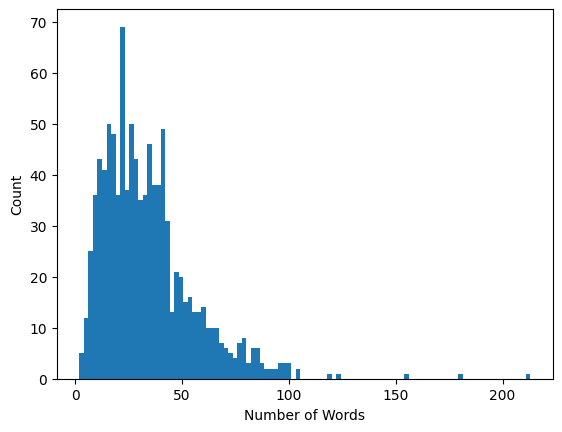

In [32]:
import matplotlib.pyplot as plt

word_counts = [len(text[0]["content"].split()) for text in subset["prompt"]]

plt.figure()
plt.hist(word_counts, bins=100)
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

Wordcloud

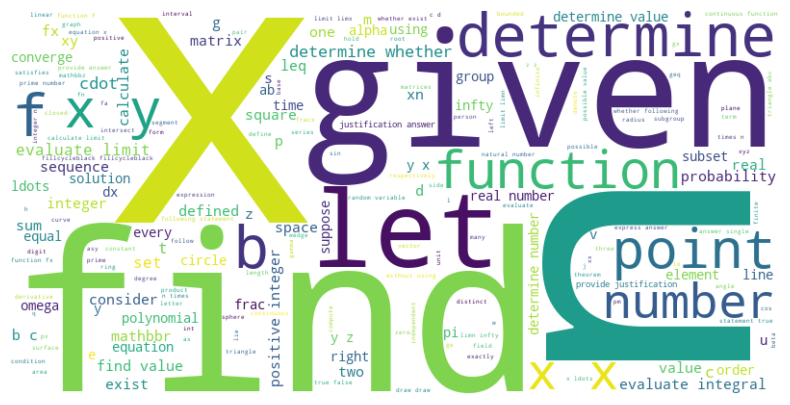

In [33]:
import re

from wordcloud import STOPWORDS, WordCloud

text = " ".join([msg[0]["content"] for msg in subset["prompt"]])

# Remove non latin, and lowercase
text = re.sub(r"[^A-Za-z\s]", "", text)
text = text.lower()

# Remove stopwords
stopwords = set(STOPWORDS)
text = " ".join(word for word in text.split() if word not in stopwords)

# Wordlcoud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Unigrams and Bigrams

In [34]:
import nltk

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /Users/roman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
from collections import Counter

from nltk import ngrams, word_tokenize

# Tokenize all texts
all_tokens = word_tokenize(text)

# Unigrams (just the tokens)
unigrams = Counter(all_tokens)

# Bigrams
bigrams = Counter(ngrams(all_tokens, 2))

Text(0, 0.5, 'Count')

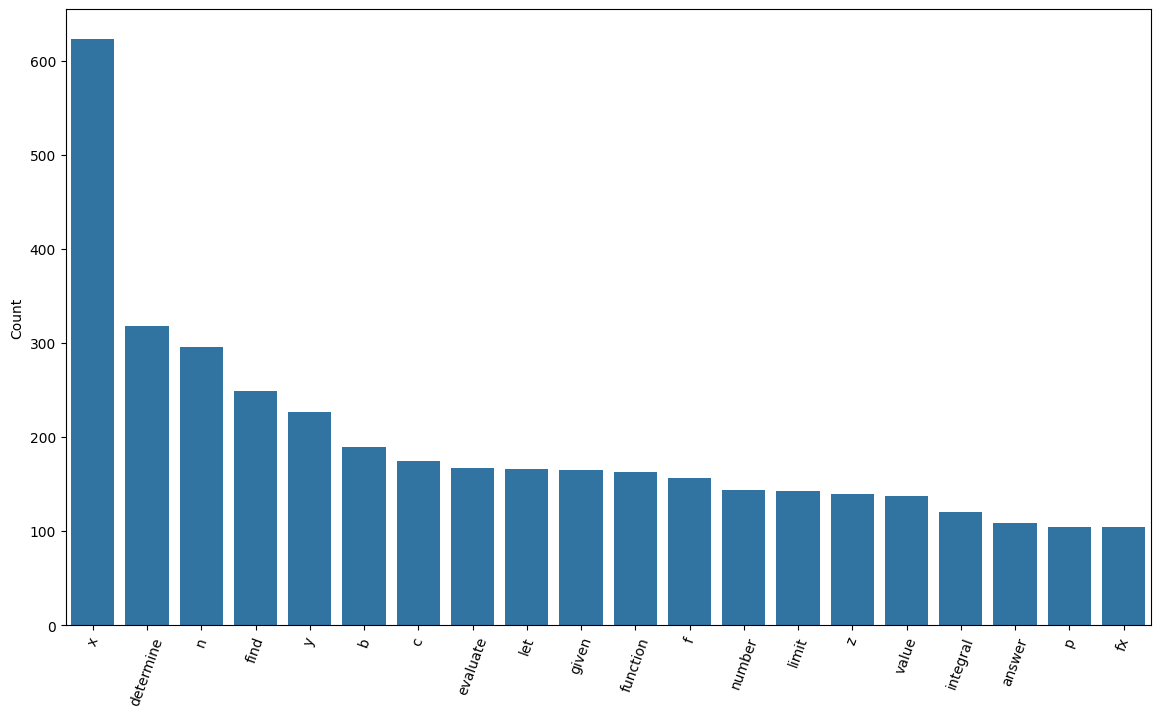

In [36]:
import seaborn as sns

unigram_counts = pd.Series(dict[str, int](unigrams)).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=unigram_counts.head(20))
plt.xticks(rotation=70)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

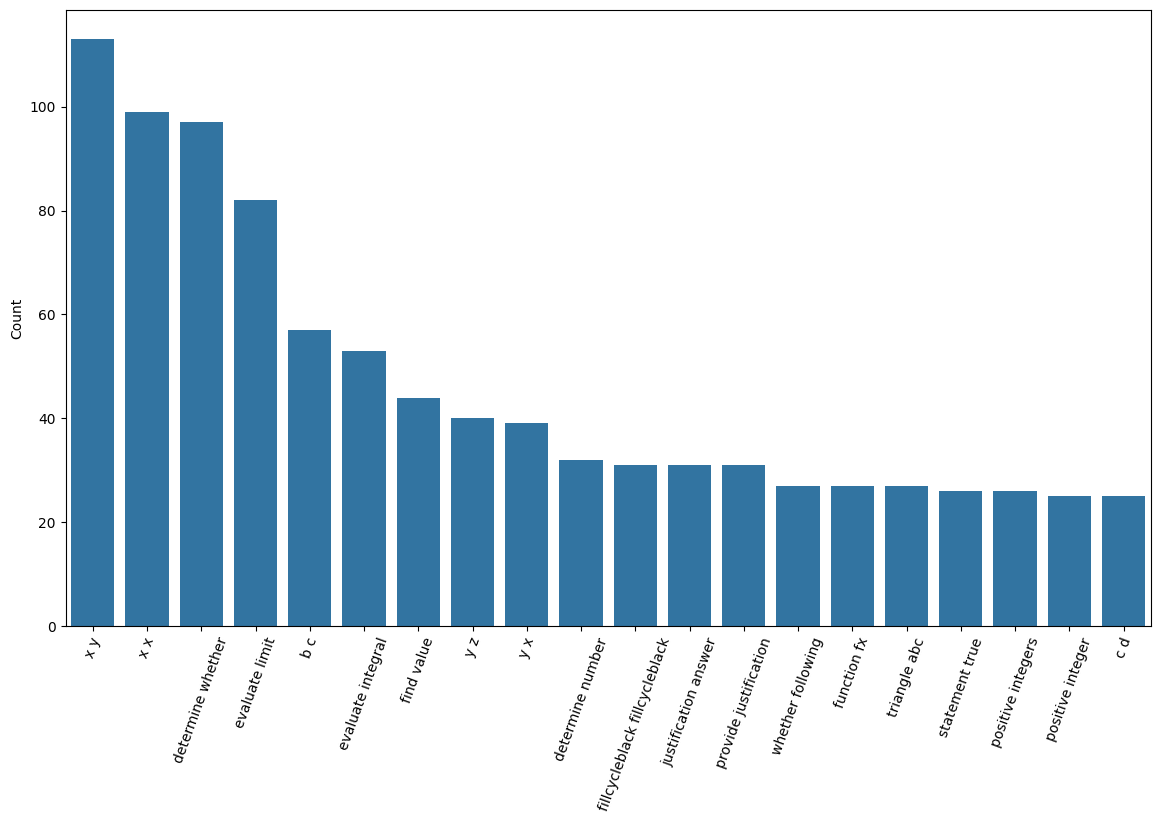

In [37]:
import seaborn as sns

bigram_counts = pd.Series(
    {key[0] + " " + key[1]: value for key, value in bigrams.items()}
).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=bigram_counts.head(20))
plt.xticks(rotation=70)
plt.ylabel("Count")

## Topic Analysis

In [ ]:
# Prepare
def clean_text(text: str) -> str:
    # Remove non latin, and lowercase
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()

    # Remove stopwords
    stopwords = set(STOPWORDS)
    text = " ".join(word for word in text.split() if word not in stopwords)

    return text


df["clean_text"] = df["prompt"].map(lambda x: clean_text(x[0]["content"]))

In [49]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create features
max_features = 1000
n_samples = 1000
count = CountVectorizer(stop_words="english", max_features=max_features)
features = count.fit_transform(df[:n_samples]["clean_text"])
feature_names = count.get_feature_names_out()

# Create LDA
n_components = 20
lda = LatentDirichletAllocation(n_components, random_state=123)
topics = lda.fit_transform(features)

# Analyse topics
n_top_words = 5
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {(topic_idx + 1)}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[: -n_top_words - 1 : -1]]))

Topic 1:
fillcycleblack derivative draw function answer
Topic 2:
answer provide determine true justification
Topic 3:
integral dx evaluate function fx
Topic 4:
triangle point angle abc ab
Topic 5:
cdot langle rangle beta sigma
Topic 6:
determine let answer set omega
Topic 7:
probability random independent variables theta
Topic 8:
value expression correct choose given
Topic 9:
positive determine integers integer number
Topic 10:
integral using evaluate series theorem
Topic 11:
series determine values converges sumninfty
Topic 12:
curve determine xy radius vector
Topic 13:
number real numbers prime square
Topic 14:
real line determine closed vertices
Topic 15:
fx function value determine px
Topic 16:
limit evaluate infty sequence limn
Topic 17:
function mathbbr fx space leq
Topic 18:
frac right left set consider
Topic 19:
equation solution function determine let
Topic 20:
matrix determine times matrices given
